In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [13]:
t = pd.read_csv('downloaded-logs-20230406-090719.csv', delimiter=',')
t.keys()

Index(['insertId', 'jsonPayload.blockHash', 'jsonPayload.blockNumber',
       'jsonPayload.contentLength', 'jsonPayload.headSlot',
       'jsonPayload.idArg', 'jsonPayload.level', 'jsonPayload.method',
       'jsonPayload.mevBoostV', 'jsonPayload.msIntoSlot', 'jsonPayload.msg',
       'jsonPayload.numTx', 'jsonPayload.pubkeyFromIndex',
       'jsonPayload.requestTimestamp', 'jsonPayload.service',
       'jsonPayload.slot', 'jsonPayload.slotStartSec',
       'jsonPayload.timestampAfterPublishing',
       'jsonPayload.timestampBeforePublishing', 'jsonPayload.ua',
       'jsonPayload.version', 'labels."compute.googleapis.com/resource_name"',
       'labels."k8s-pod/app"', 'labels."k8s-pod/pod-template-hash"',
       'labels."k8s-pod/project"', 'logName', 'receiveLocation',
       'receiveTimestamp', 'receivedLocation', 'resource.labels.cluster_name',
       'resource.labels.container_name', 'resource.labels.location',
       'resource.labels.namespace_name', 'resource.labels.pod_name',
  

In [14]:
t = t[['jsonPayload.slot', 'jsonPayload.msIntoSlot', 'jsonPayload.timestampAfterPublishing', 'jsonPayload.timestampBeforePublishing', 'jsonPayload.requestTimestamp']]
len(t)

1401

In [15]:
t.head()

,jsonPayload.slot,jsonPayload.msIntoSlot,jsonPayload.timestampAfterPublishing,jsonPayload.timestampBeforePublishing,jsonPayload.requestTimestamp
0,6163533,791,1680786420156,1680786419805,1680786419791
1,6163533,791,1680786420156,1680786419805,1680786419791
2,6163533,791,1680786420156,1680786419805,1680786419791
3,6163527,1590,1680786348977,1680786348610,1680786348590
4,6163527,1590,1680786348977,1680786348610,1680786348590


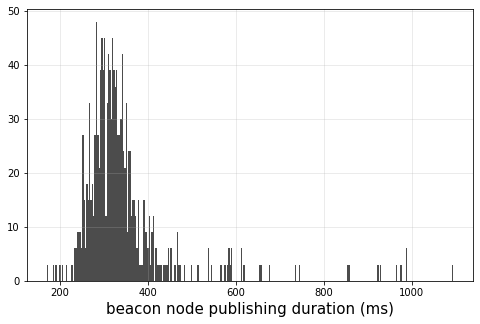

In [11]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(t['jsonPayload.timestampAfterPublishing']-t['jsonPayload.timestampBeforePublishing'], bins=300, color='k', alpha=0.7)
ax.set_xlabel('beacon node publishing duration (ms)', size=15)
plt.show()

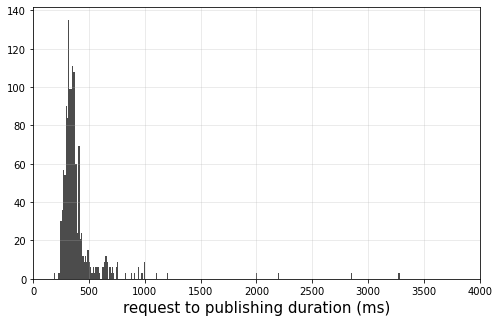

In [20]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(t['jsonPayload.timestampAfterPublishing']-t['jsonPayload.requestTimestamp'], bins=800, color='k', alpha=0.7)
ax.set_xlabel('request to publishing duration (ms)', size=15)
ax.set_xlim(0,4000)
plt.show()

In [ ]:
publish_time = 

In [21]:
# with 2 additional ts

In [43]:
t = pd.read_csv('downloaded-logs-20230406-131001.csv', delimiter=',')
t.keys()

Index(['insertId', 'jsonPayload.blockHash', 'jsonPayload.contentLength',
       'jsonPayload.headSlot', 'jsonPayload.idArg', 'jsonPayload.level',
       'jsonPayload.method', 'jsonPayload.mevBoostV', 'jsonPayload.msIntoSlot',
       'jsonPayload.msg', 'jsonPayload.pubkeyFromIndex',
       'jsonPayload.requestTimestamp', 'jsonPayload.service',
       'jsonPayload.slot', 'jsonPayload.slotStartSec',
       'jsonPayload.timestampAfterAlreadyDelivered',
       'jsonPayload.timestampAfterBlocked',
       'jsonPayload.timestampAfterPublishing',
       'jsonPayload.timestampBeforePublishing', 'jsonPayload.ua',
       'jsonPayload.version', 'labels."compute.googleapis.com/resource_name"',
       'labels."k8s-pod/app"', 'labels."k8s-pod/pod-template-hash"',
       'labels."k8s-pod/project"', 'logName', 'receiveLocation',
       'receiveTimestamp', 'receivedLocation', 'resource.labels.cluster_name',
       'resource.labels.container_name', 'resource.labels.location',
       'resource.labels.names

In [44]:
t = t[['jsonPayload.slot', 'jsonPayload.msIntoSlot', 'jsonPayload.timestampAfterAlreadyDelivered','jsonPayload.timestampAfterBlocked', 'jsonPayload.timestampAfterPublishing', 'jsonPayload.timestampBeforePublishing', 'jsonPayload.requestTimestamp']]
len(t)

157

In [45]:
t

,jsonPayload.slot,jsonPayload.msIntoSlot,jsonPayload.timestampAfterAlreadyDelivered,jsonPayload.timestampAfterBlocked,jsonPayload.timestampAfterPublishing,jsonPayload.timestampBeforePublishing,jsonPayload.requestTimestamp
0,6164747,1161,1680800988168,1680800988167,1680800988519,1680800988176,1680800988161
1,6164746,964,1680800975972,1680800975971,1680800976302,1680800975988,1680800975964
2,6164744,990,1680800951997,1680800951997,1680800952280,1680800952003,1680800951990
3,6164739,1231,1680800892236,1680800892236,1680800892576,1680800892251,1680800892231
4,6164738,635,1680800879644,1680800879643,1680800879998,1680800879671,1680800879635
...,...,...,...,...,...,...,...
152,6164285,1055,1680795444060,1680795444060,1680795444434,1680795444075,1680795444055
153,6164282,558,1680795407568,1680795407568,1680795407867,1680795407574,1680795407558
154,6164280,667,1680795383678,1680795383677,1680795383951,1680795383686,1680795383667
155,6164279,1575,1680795372585,1680795372584,1680795372963,1680795372609,1680795372575


In [46]:
res = pd.DataFrame()
res['msIntoSlot'] = t['jsonPayload.msIntoSlot']
res['blocked'] = t['jsonPayload.timestampAfterBlocked'] - t['jsonPayload.requestTimestamp']
res['delivered'] = t['jsonPayload.timestampAfterAlreadyDelivered'] - t['jsonPayload.timestampAfterBlocked']
res['fetch payload'] = t['jsonPayload.timestampBeforePublishing'] - t['jsonPayload.timestampAfterAlreadyDelivered']
res['publish'] = t['jsonPayload.timestampAfterPublishing'] - t['jsonPayload.timestampBeforePublishing']


In [56]:
res['blocked'].values

array([   6,    7,    7,    5,    8,    6,    6,    8,   11,    5,   24,
          7,    7,   27,   25,    4,    5,    5,    7,    8,    6,    9,
         29, 2578,    6,    7,   10,   17,    7,    4,    5,    7, 3846,
          5,    9,    6,    7,   12,   10,    5,    5,   32,    6,    5,
       1807,    5,    5,    7,    5,    6,    6, 2232,   11,    8,    7,
          5,    6,   12,    5,    6,   13,    9,   11,   20,   10,    7,
          5,    7,    6,    9,    9,    5,    6,    6,    7,    8,    4,
        537,    5,    6,    5,   14,    5,    5,    6,    5,    6,    6,
          8, 2173,   20,    6,   10,    9,    6,    6,    9,    6,    7,
          4,    9,    8,    8,    8,    8,    5,    6,    5,    7,   14,
         16,    5,    5,    8,   11,    7,    5,    9,    6,    5,    6,
          5,   10,    5,    6,    5,    6,    5,    5,    5,    6,    5,
          5,    5,    9,    7,    8,    6,    7,    6,    7,    6,    7,
          8,    5,    6,   11,   10,    9,   40,   